<a href="https://colab.research.google.com/github/Piaktipik/PExBiD/blob/master/notebooks/uav4pe_data_analysis_notebook_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UAV4PE Data Analysis Notebook

This notebook contains resources to analyse expermiental results of the PExUAV framework for autonomus UAV mission planning.

The focus of the current analysis include:
* General experiments distribution (Simulation, Emulation, Real)
* The number of commands (actions) executed
* The percentage of surface area explored, and 
* The success rate, measured in two ways:
  1.   Percentage of area explored equal to 100%
  2.   Percentage of mission where the target was found

## 1. Python Libraries & Data loading:

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

# Load Dataframes from repository:
! git clone https://github.com/qutas/uav4pe_experiments
# Load Dataframes from Drive
baseFolder = '/content/uav4pe_experiments/results'

# Load file names
simuResults = 'simulation/planetExpGlobalResults-22-11-06T22-55-00.csv' 
emulResults = 'emulation/planetExpGlobalResults-22-11-06T22-48-40.csv' 
realResults = 'real/planetExpGlobalResults-22-11-03T13-02-47.csv'

dfSimu = pd.read_csv(f'{baseFolder}/{simuResults}',sep='\t')
dfEmul = pd.read_csv(f'{baseFolder}/{emulResults}',sep='\t')
dfReal = pd.read_csv(f'{baseFolder}/{realResults}',sep='\t')

# Create dataframe with all data:
df = pd.concat([dfSimu, dfEmul, dfReal], ignore_index=True)
df.head()

fatal: destination path 'uav4pe_experiments' already exists and is not an empty directory.


,type,conf,expFolder,map,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal,actionsCount,actionSequence
0,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,0,1,49.39,11,59,"[0, 8, 25, 16, 10]","[1, 2, 4, 3, 2, 2, 2, 2, 1, 3, 3, 1, 1, 3, 2, ..."
1,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,1,1,64.63,5,58,"[0, 8, 33, 13, 4]","[2, 2, 2, 2, 2, 2, 3, 2, 1, 4, 1, 2, 3, 1, 4, ..."
2,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,2,1,43.90,10,59,"[4, 6, 25, 16, 8]","[3, 3, 2, 0, 4, 2, 2, 3, 3, 2, 2, 2, 1, 2, 3, ..."
3,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,3,1,45.12,9,59,"[6, 6, 23, 12, 12]","[2, 2, 2, 2, 4, 4, 2, 2, 3, 0, 4, 2, 1, 1, 2, ..."
4,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,4,1,52.44,9,59,"[1, 5, 23, 14, 16]","[4, 3, 2, 2, 2, 3, 3, 1, 4, 3, 2, 2, 3, 2, 4, ..."


In [82]:
df.describe().round(2)

,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal
count,2123.00,2123.00,2123.00,2123.00,2123.00
mean,4.91,0.63,66.11,5.27,49.35
std,3.46,0.48,26.07,3.62,14.50
min,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,45.73,2.00,35.00
50%,5.00,1.00,61.54,4.00,53.00
75%,8.00,1.00,96.15,8.00,59.00
max,11.00,1.00,100.00,18.00,72.00


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            2123 non-null   object 
 1   conf            2123 non-null   object 
 2   expFolder       2123 non-null   object 
 3   map             2123 non-null   object 
 4   expNumber       2123 non-null   int64  
 5   targetFound     2123 non-null   int64  
 6   exploredArea    2123 non-null   float64
 7   takeoffsCount   2123 non-null   int64  
 8   actionsTotal    2123 non-null   int64  
 9   actionsCount    2123 non-null   object 
 10  actionSequence  2123 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 182.6+ KB


## 2. Data Description

In [84]:
# df.groupby(['map'])['exploredArea'].describe().round(2)
df.groupby(['map','type']).mean().round(2)

expNumber  targetFound  exploredArea  takeoffsCount  \
map      type                                                              
map-16A  emulation        4.74         0.82         64.74           2.84   
         real             0.90         1.00         82.68           5.00   
         simulation       5.07         0.95         62.82           6.00   
map-16AD emulation        4.74         0.87         67.69           2.48   
         real             0.70         1.00         86.80           5.30   
         simulation       5.07         0.93         67.97           5.95   
map-16B  emulation        4.74         0.30         65.84           2.43   
         real             0.80         0.50         83.78           5.20   
         simulation       5.07         0.28         62.93           6.03   
map-16BD emulation        4.74         0.34         68.75           2.30   
         real             1.14         0.71         85.62           4.93   
         simulation       5.06         0.39         68.15           5.89   

                     actionsTotal  
map      type                      
map-16A  emulation          37.75  
         real               42.00  
         simulation         53.15  
map-16AD emulation          36.23  
         real               44.30  
         simulation         52.11  
map-16B  emulation          37.39  
         real               42.90  
         simulation         53.23  
map-16BD emulation          36.38  
         real               40.86  
         simulation         52.22

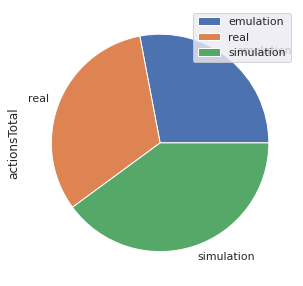

In [85]:
plot = df.groupby(['type']).mean().plot.pie(y='actionsTotal', figsize=(5, 5))

## Simulated Data

In [86]:
dfSimu.head()

,type,conf,expFolder,map,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal,actionsCount,actionSequence
0,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,0,1,49.39,11,59,"[0, 8, 25, 16, 10]","[1, 2, 4, 3, 2, 2, 2, 2, 1, 3, 3, 1, 1, 3, 2, ..."
1,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,1,1,64.63,5,58,"[0, 8, 33, 13, 4]","[2, 2, 2, 2, 2, 2, 3, 2, 1, 4, 1, 2, 3, 1, 4, ..."
2,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,2,1,43.90,10,59,"[4, 6, 25, 16, 8]","[3, 3, 2, 0, 4, 2, 2, 3, 3, 2, 2, 2, 1, 2, 3, ..."
3,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,3,1,45.12,9,59,"[6, 6, 23, 12, 12]","[2, 2, 2, 2, 4, 4, 2, 2, 3, 0, 4, 2, 1, 1, 2, ..."
4,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,4,1,52.44,9,59,"[1, 5, 23, 14, 16]","[4, 3, 2, 2, 2, 3, 3, 1, 4, 3, 2, 2, 3, 2, 4, ..."


In [87]:
dfSimu.info()
# dfSimu.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            1659 non-null   object 
 1   conf            1659 non-null   object 
 2   expFolder       1659 non-null   object 
 3   map             1659 non-null   object 
 4   expNumber       1659 non-null   int64  
 5   targetFound     1659 non-null   int64  
 6   exploredArea    1659 non-null   float64
 7   takeoffsCount   1659 non-null   int64  
 8   actionsTotal    1659 non-null   int64  
 9   actionsCount    1659 non-null   object 
 10  actionSequence  1659 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 142.7+ KB


In [88]:
dfSimu.describe()

,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,5.064497,0.639542,65.447185,5.968656,52.680530
std,3.461149,0.480278,26.044352,3.654101,13.918873
min,0.000000,0.000000,10.900000,0.000000,31.000000
25%,2.000000,0.000000,44.870000,3.000000,35.000000
50%,5.000000,1.000000,57.050000,5.000000,58.000000
75%,8.000000,1.000000,96.950000,9.000000,63.000000
max,11.000000,1.000000,100.000000,18.000000,71.000000


## Emulated Data

In [89]:
dfEmul.head()

,type,conf,expFolder,map,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal,actionsCount,actionSequence
0,emulation,conf7.1,Exp-22-08-29T07-22-36,map-16A,0,1,99.39,2,34,"[1, 2, 28, 3, 0]","[2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
1,emulation,conf7.1,Exp-22-08-29T07-22-36,map-16AD,0,1,53.21,3,34,"[2, 0, 23, 7, 2]","[2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2, 2, ..."
2,emulation,conf7.1,Exp-22-08-29T07-22-36,map-16B,0,0,51.22,3,34,"[2, 0, 17, 14, 1]","[3, 2, 3, 3, 3, 0, 2, 3, 3, 3, 2, 3, 2, 3, 3, ..."
3,emulation,conf7.1,Exp-22-08-29T07-22-36,map-16BD,0,1,99.36,1,33,"[0, 3, 27, 3, 0]","[2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, ..."
4,emulation,conf7.1,Exp-22-10-09T22-47-57,map-16A,0,1,100.00,1,50,"[0, 0, 35, 14, 1]","[2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, ..."


In [90]:
dfEmul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            420 non-null    object 
 1   conf            420 non-null    object 
 2   expFolder       420 non-null    object 
 3   map             420 non-null    object 
 4   expNumber       420 non-null    int64  
 5   targetFound     420 non-null    int64  
 6   exploredArea    420 non-null    float64
 7   takeoffsCount   420 non-null    int64  
 8   actionsTotal    420 non-null    int64  
 9   actionsCount    420 non-null    object 
 10  actionSequence  420 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 36.2+ KB


In [91]:
dfEmul.describe()

,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal
count,420.000000,420.000000,420.000000,420.000000,420.000000
mean,4.742857,0.583333,66.755500,2.511905,36.938095
std,3.373429,0.493595,26.122238,1.831142,9.209105
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,51.220000,1.000000,34.000000
50%,4.000000,1.000000,65.310000,2.000000,34.000000
75%,7.000000,1.000000,91.512500,4.000000,36.000000
max,11.000000,1.000000,100.000000,10.000000,72.000000


## Real Data

In [92]:
dfReal.head()

,type,conf,expFolder,map,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal,actionsCount,actionSequence
0,real,conf7.1,Exp-22-08-29,map-16A,0,1,72.56,5,37,"[3, 0, 25, 6, 3]","[2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, ..."
1,real,conf7.1,Exp-22-08-29,map-16AD,0,1,100.00,1,30,"[0, 3, 22, 5, 0]","[2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 1, 2, ..."
2,real,conf7.1,Exp-22-08-29,map-16AD,1,1,100.00,2,25,"[2, 0, 20, 2, 1]","[2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, ..."
3,real,conf7.1,Exp-22-08-29,map-16B,0,1,100.00,3,38,"[1, 1, 31, 3, 2]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, ..."
4,real,conf7.1,Exp-22-08-29,map-16B,1,1,100.00,1,35,"[0, 2, 28, 5, 0]","[2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, ..."


In [93]:
dfReal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            44 non-null     object 
 1   conf            44 non-null     object 
 2   expFolder       44 non-null     object 
 3   map             44 non-null     object 
 4   expNumber       44 non-null     int64  
 5   targetFound     44 non-null     int64  
 6   exploredArea    44 non-null     float64
 7   takeoffsCount   44 non-null     int64  
 8   actionsTotal    44 non-null     int64  
 9   actionsCount    44 non-null     object 
 10  actionSequence  44 non-null     object 
dtypes: float64(1), int64(4), object(6)
memory usage: 3.9+ KB


In [94]:
dfReal.describe()

,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.909091,0.795455,84.801818,5.090909,42.363636
std,1.007372,0.408032,18.724619,2.743433,9.948918
min,0.000000,0.000000,14.740000,1.000000,8.000000
25%,0.000000,1.000000,73.017500,3.000000,37.000000
50%,1.000000,1.000000,93.135000,5.000000,43.000000
75%,2.000000,1.000000,100.000000,7.000000,48.000000
max,3.000000,1.000000,100.000000,14.000000,67.000000


In [95]:
dfReal['conf'].unique()

array(['conf7.1', 'conf8', 'conf8.1'], dtype=object)

# 3. Data filtering & Extraction
The data extracted from the experiments is filtered in this section. 



## General Data Filtering

In [96]:
# Filter Experiments with 0 explored aerea.
print(df.shape)
dff = df[df['exploredArea'] > 0]
print(dff.shape)

(2123, 11)
(2112, 11)


In [97]:
#dff.head()
dff.describe().round(2)
#df.info()

,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal
count,2112.00,2112.00,2112.00,2112.00,2112.00
mean,4.89,0.63,66.45,5.29,49.29
std,3.45,0.48,25.69,3.61,14.43
min,0.00,0.00,1.22,0.00,8.00
25%,2.00,0.00,46.15,2.00,35.00
50%,5.00,1.00,61.56,4.00,53.00
75%,8.00,1.00,96.34,8.00,59.00
max,11.00,1.00,100.00,18.00,71.00


In [98]:
dff.groupby(['map','type']).mean().round(2)

expNumber  targetFound  exploredArea  takeoffsCount  \
map      type                                                              
map-16A  emulation        4.63         0.84         66.65           2.92   
         real             0.90         1.00         82.68           5.00   
         simulation       5.07         0.95         62.82           6.00   
map-16AD emulation        4.61         0.89         69.68           2.55   
         real             0.70         1.00         86.80           5.30   
         simulation       5.07         0.93         67.97           5.95   
map-16B  emulation        4.63         0.31         67.12           2.48   
         real             0.80         0.50         83.78           5.20   
         simulation       5.07         0.28         62.93           6.03   
map-16BD emulation        4.59         0.35         70.77           2.37   
         real             1.14         0.71         85.62           4.93   
         simulation       5.06         0.39         68.15           5.89   

                     actionsTotal  
map      type                      
map-16A  emulation          37.14  
         real               42.00  
         simulation         53.15  
map-16AD emulation          35.90  
         real               44.30  
         simulation         52.11  
map-16B  emulation          36.75  
         real               42.90  
         simulation         53.23  
map-16BD emulation          35.35  
         real               40.86  
         simulation         52.22

In [99]:
# Review removed experiments 
exploreZero = df[df['exploredArea'] <= 0]#.describe()
exploreZero.groupby(["conf","type","expFolder","map"])['exploredArea'].describe()
# Experiments with 0 explored area -> Due to emulator UAV arming issue at start.

count  mean  std  min  25%  \
conf    type      expFolder             map                                    
conf7.1 emulation Exp-22-08-29T08-57-20 map-16AD    1.0   0.0  NaN  0.0  0.0   
                  Exp-22-09-05T13-21-58 map-16A     1.0   0.0  NaN  0.0  0.0   
                  Exp-22-10-09T22-47-57 map-16A     2.0   0.0  0.0  0.0  0.0   
                                        map-16AD    2.0   0.0  0.0  0.0  0.0   
                                        map-16B     2.0   0.0  0.0  0.0  0.0   
                                        map-16BD    3.0   0.0  0.0  0.0  0.0   

                                                  50%  75%  max  
conf    type      expFolder             map                      
conf7.1 emulation Exp-22-08-29T08-57-20 map-16AD  0.0  0.0  0.0  
                  Exp-22-09-05T13-21-58 map-16A   0.0  0.0  0.0  
                  Exp-22-10-09T22-47-57 map-16A   0.0  0.0  0.0  
                                        map-16AD  0.0  0.0  0.0  
                                        map-16B   0.0  0.0  0.0  
                                        map-16BD  0.0  0.0  0.0

In [100]:
# Review experiments with 0 takeoffs - not removed, due to minor navigation loggin issue (take off not detected, however completed).
takeoffsZero = df[df['takeoffsCount'] <= 0]#.describe()
takeoffsZero.groupby(["conf","type","expFolder","map"])['exploredArea'].describe()

count        mean  \
conf    type       expFolder             map                           
conf1   emulation  Exp-22-08-30T06-50-53 map-16B     2.0   80.180000   
                                         map-16BD    1.0  100.000000   
conf2   emulation  Exp-22-08-30T06-50-53 map-16AD    2.0   78.525000   
                                         map-16BD    1.0  100.000000   
conf7   emulation  Exp-22-08-29T08-57-20 map-16AD    1.0   83.330000   
conf7.1 emulation  Exp-22-08-29T08-57-20 map-16AD    1.0    0.000000   
                                         map-16BD    1.0   89.740000   
                   Exp-22-09-05T13-21-58 map-16A     1.0    0.000000   
                                         map-16B     1.0   57.320000   
                   Exp-22-10-09T22-47-57 map-16A     4.0   41.615000   
                                         map-16AD    2.0    0.000000   
                                         map-16B     3.0    8.536667   
                                         map-16BD    5.0   40.000000   
conf7.8 simulation Exp-22-09-30T20-48-31 map-16A     1.0  100.000000   
conf8   emulation  Exp-22-09-05T13-21-58 map-16B     2.0   42.075000   
                                         map-16BD    1.0   59.620000   
                   Exp-22-09-06T07-38-11 map-16A     1.0   92.070000   
                                         map-16AD    3.0   58.550000   
                                         map-16B     2.0   70.125000   
                                         map-16BD    3.0   74.570000   

                                                         std     min  \
conf    type       expFolder             map                           
conf1   emulation  Exp-22-08-30T06-50-53 map-16B   16.814999   68.29   
                                         map-16BD        NaN  100.00   
conf2   emulation  Exp-22-08-30T06-50-53 map-16AD  15.860405   67.31   
                                         map-16BD        NaN  100.00   
conf7   emulation  Exp-22-08-29T08-57-20 map-16AD        NaN   83.33   
conf7.1 emulation  Exp-22-08-29T08-57-20 map-16AD        NaN    0.00   
                                         map-16BD        NaN   89.74   
                   Exp-22-09-05T13-21-58 map-16A         NaN    0.00   
                                         map-16B         NaN   57.32   
                   Exp-22-10-09T22-47-57 map-16A   48.927530    0.00   
                                         map-16AD   0.000000    0.00   
                                         map-16B   14.785940    0.00   
                                         map-16BD  54.772256    0.00   
conf7.8 simulation Exp-22-09-30T20-48-31 map-16A         NaN  100.00   
conf8   emulation  Exp-22-09-05T13-21-58 map-16B   13.795653   32.32   
                                         map-16BD        NaN   59.62   
                   Exp-22-09-06T07-38-11 map-16A         NaN   92.07   
                                         map-16AD  26.771320   28.21   
                                         map-16B   11.207642   62.20   
                                         map-16BD  22.303347   58.33   

                                                        25%      50%  \
conf    type       expFolder             map                           
conf1   emulation  Exp-22-08-30T06-50-53 map-16B    74.2350   80.180   
                                         map-16BD  100.0000  100.000   
conf2   emulation  Exp-22-08-30T06-50-53 map-16AD   72.9175   78.525   
                                         map-16BD  100.0000  100.000   
conf7   emulation  Exp-22-08-29T08-57-20 map-16AD   83.3300   83.330   
conf7.1 emulation  Exp-22-08-29T08-57-20 map-16AD    0.0000    0.000   
                                         map-16BD   89.7400   89.740   
                   Exp-22-09-05T13-21-58 map-16A     0.0000    0.000   
                                         map-16B    57.3200   57.320   
                   Exp-22-10-09T22-47-57 map-16A     0.0000   35.975   
                 

## Extraction mission completed
Extraction experiments with 100% area explored (mission completed)

In [101]:
# Capture the configurations that complete the exploration (100% area explored)
print(dff.shape)
explored100 = dff[dff['exploredArea'] == 100]
print(explored100.shape)
explored100 = explored100[explored100['conf'] != 'conf0']
print(explored100.shape)
# Show results table
explored100.groupby(["conf","type"])['actionsTotal'].describe().sort_values(by=['mean'])

(2112, 11)
(395, 11)
(299, 11)


,,count,mean,std,min,25%,50%,75%,max
conf,type,,,,,,,,
conf1,emulation,4.0,33.000000,0.816497,32.0,32.75,33.0,33.25,34.0
conf8,emulation,2.0,35.000000,2.828427,33.0,34.00,35.0,36.00,37.0
conf7.1,real,11.0,35.181818,6.539391,25.0,31.50,35.0,38.50,46.0
conf2,emulation,1.0,36.000000,NaN,36.0,36.00,36.0,36.00,36.0
conf8,real,2.0,42.000000,9.899495,35.0,38.50,42.0,45.50,49.0
conf7.1,emulation,32.0,48.500000,9.705336,29.0,40.75,50.5,55.00,67.0
conf8,simulation,10.0,55.400000,2.011080,51.0,54.25,56.0,56.75,58.0
conf7.3,simulation,41.0,60.560976,7.252754,41.0,56.00,63.0,66.00,69.0
conf7.6,simulation,28.0,60.571429,5.820962,42.0,57.75,61.0,64.25,69.0


In [102]:
# Show results summary by map
explored100.groupby(["map"])['actionsTotal'].describe()

,count,mean,std,min,25%,50%,75%,max
map,,,,,,,,
map-16A,53.0,60.245283,8.866327,33.0,56.0,62.0,67.00,70.0
map-16AD,97.0,57.195876,10.010036,25.0,54.0,59.0,65.00,70.0
map-16B,55.0,60.472727,9.118265,33.0,56.5,63.0,67.00,71.0
map-16BD,94.0,57.031915,10.276241,27.0,53.0,59.0,64.75,71.0


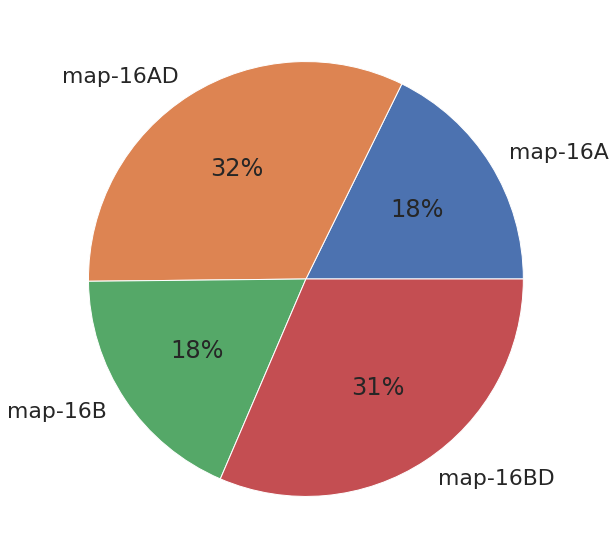

In [103]:
# Pie plot of the success distribution grouped by map
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
explored100.map.str.get_dummies().sum().plot.pie(label='', autopct='%1.0f%%')

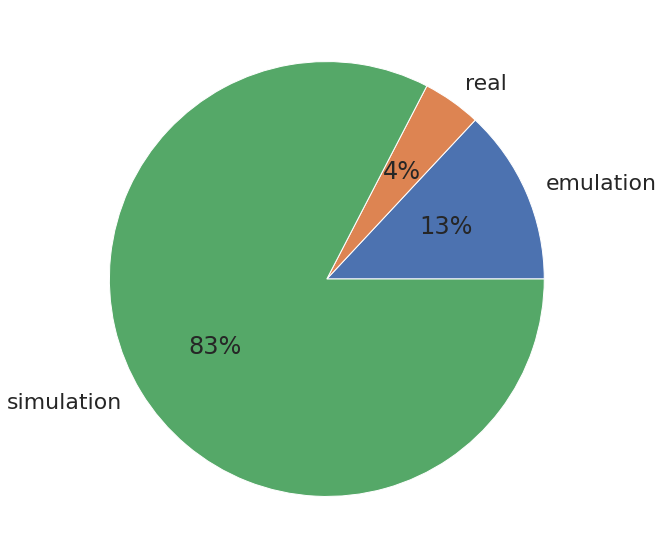

In [104]:
# Pie plot of the success distribution grouped by type.
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
explored100.type.str.get_dummies().sum().plot.pie(label='', autopct='%1.0f%%')

In [105]:
# Capture the configurations that complete the exploration (100% area explored) just in simulation
print(explored100.shape)
explored100Simu = explored100[explored100['type'] == "simulation"]
print(explored100Simu.shape)
# Show results table
explored100Simu.groupby(["conf","map"])['actionsTotal'].describe()

(299, 11)
(247, 11)


count       mean       std   min    25%   50%    75%   max
conf    map                                                                 
conf7   map-16B     1.0  70.000000       NaN  70.0  70.00  70.0  70.00  70.0
        map-16BD    1.0  59.000000       NaN  59.0  59.00  59.0  59.00  59.0
conf7.1 map-16AD   12.0  64.000000  5.222330  55.0  60.25  65.5  67.50  70.0
        map-16B     1.0  66.000000       NaN  66.0  66.00  66.0  66.00  66.0
        map-16BD    7.0  60.571429  9.144345  47.0  54.00  62.0  68.00  71.0
conf7.2 map-16A     7.0  64.000000  5.385165  56.0  60.00  67.0  67.50  70.0
        map-16AD   11.0  58.181818  8.072400  46.0  51.50  58.0  65.00  70.0
        map-16B     5.0  62.400000  6.268971  54.0  59.00  62.0  68.00  69.0
        map-16BD    9.0  60.666667  6.782330  51.0  56.00  63.0  65.00  70.0
conf7.3 map-16A    10.0  63.200000  6.142746  51.0  62.25  65.0  67.00  69.0
        map-16AD   12.0  55.083333  8.743396  41.0  49.25  56.0  62.00  67.0
        map-16B     9.0  64.666667  4.000000  56.0  63.00  64.0  68.00  69.0
        map-16BD   10.0  60.800000  4.871687  53.0  57.50  61.0  64.75  67.0
conf7.4 map-16A     9.0  63.222222  5.214829  54.0  60.00  65.0  68.00  69.0
        map-16AD   10.0  61.600000  3.657564  58.0  58.25  61.0  64.25  68.0
        map-16B     7.0  62.285714  5.407226  56.0  57.50  62.0  67.00  69.0
        map-16BD   11.0  60.272727  5.178627  49.0  58.00  62.0  64.00  66.0
conf7.5 map-16A     7.0  61.714286  6.651172  54.0  55.50  64.0  66.50  70.0
        map-16AD   12.0  59.916667  5.664215  54.0  54.75  58.5  65.25  68.0
        map-16B     7.0  62.571429  6.852181  53.0  57.50  64.0  67.50  71.0
        map-16BD   11.0  61.000000  5.272571  52.0  58.50  62.0  64.50  68.0
conf7.6 map-16A     3.0  59.666667  5.686241  55.0  56.50  58.0  62.00  66.0
        map-16AD    9.0  59.888889  4.833333  50.0  57.00  61.0  64.00  65.0
        map-16B     7.0  62.714286  3.946065  58.0  60.50  61.0  65.00  69.0
        map-16BD    9.0  59.888889  8.115486  42.0  56.00  61.0  64.00  69.0
conf7.7 map-16A     3.0  58.333333  4.932883  55.0  55.50  56.0  60.00  64.0
        map-16AD    6.0  62.000000  4.147288  54.0  62.00  63.0  64.75  65.0
        map-16B     4.0  65.750000  5.439056  58.0  64.00  67.5  69.25  70.0
        map-16BD    9.0  64.000000  4.472136  56.0  61.00  65.0  68.00  69.0
conf7.8 map-16A     4.0  64.750000  6.396614  57.0  60.75  66.0  70.00  70.0
        map-16AD    4.0  66.500000  1.290994  65.0  65.75  66.5  67.25  68.0
        map-16B     2.0  64.500000  0.707107  64.0  64.25  64.5  64.75  65.0
        map-16BD    5.0  62.800000  8.408329  49.0  62.00  64.0  69.00  70.0
conf7.9 map-16A     1.0  68.000000       NaN  68.0  68.00  68.0  68.00  68.0
        map-16AD    1.0  69.000000       NaN  69.0  69.00  69.0  69.00  69.0
        map-16B     1.0  66.000000       NaN  66.0  66.00  66.0  66.00  66.0
conf8   map-16A     2.0  56.500000  0.707107  56.0  56.25  56.5  56.75  57.0
        map-16AD    4.0  56.500000  1.290994  55.0  55.75  56.5  57.25  58.0
        map-16BD    4.0  53.750000  2.061553  51.0  53.25  54.0  54.50  56.0

In [106]:
# Capture the configurations that complete the exploration (100% area explored) just in emulation
print(explored100.shape)
explored100Emul = explored100[explored100['type'] == "emulation"]
print(explored100Emul.shape)
# Show results table
explored100Emul.groupby(["conf","map"])['actionsTotal'].describe()

(299, 11)
(39, 11)


count       mean        std   min    25%   50%    75%   max
conf    map                                                                  
conf1   map-16A     1.0  34.000000        NaN  34.0  34.00  34.0  34.00  34.0
        map-16AD    1.0  33.000000        NaN  33.0  33.00  33.0  33.00  33.0
        map-16BD    2.0  32.500000   0.707107  32.0  32.25  32.5  32.75  33.0
conf2   map-16BD    1.0  36.000000        NaN  36.0  36.00  36.0  36.00  36.0
conf7.1 map-16A     5.0  50.200000  10.686440  34.0  50.00  51.0  52.00  64.0
        map-16AD    9.0  46.444444  11.381027  29.0  40.00  47.0  54.00  64.0
        map-16B     8.0  52.375000   9.022789  38.0  45.75  54.5  56.50  67.0
        map-16BD   10.0  46.400000   8.435375  33.0  40.25  45.5  54.75  57.0
conf8   map-16AD    1.0  37.000000        NaN  37.0  37.00  37.0  37.00  37.0
        map-16BD    1.0  33.000000        NaN  33.0  33.00  33.0  33.00  33.0

In [107]:
# Capture the configurations that complete the exploration (100% area explored) just in real
print(explored100.shape)
bestReal = explored100[explored100['type'] == "real"]
print(bestReal.shape)
# Show results table
bestReal.groupby(["conf","map"])['actionsTotal'].describe()

(299, 11)
(13, 11)


count       mean       std   min   25%   50%   75%   max
conf    map                                                               
conf7.1 map-16A     1.0  33.000000       NaN  33.0  33.0  33.0  33.0  33.0
        map-16AD    5.0  36.800000  9.038805  25.0  30.0  39.0  44.0  46.0
        map-16B     3.0  35.333333  2.516611  33.0  34.0  35.0  36.5  38.0
        map-16BD    2.0  32.000000  7.071068  27.0  29.5  32.0  34.5  37.0
conf8   map-16BD    2.0  42.000000  9.899495  35.0  38.5  42.0  45.5  49.0

[Text(0, 0.5, 'Configurations'), Text(0.5, 0, 'Total number of actions')]

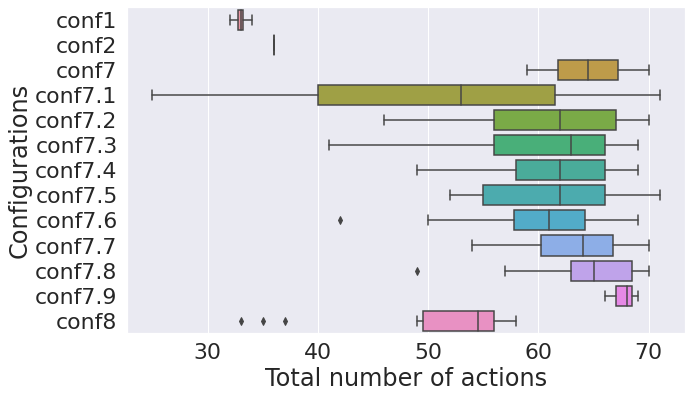

In [108]:
# Compare the total number of actions needed to complete the mission for all the configurations
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
plotMix = sns.boxplot(data=explored100.sort_values(by=['conf']), x="actionsTotal", y="conf")
plotMix.set(xlabel='Total number of actions', ylabel='Configurations')

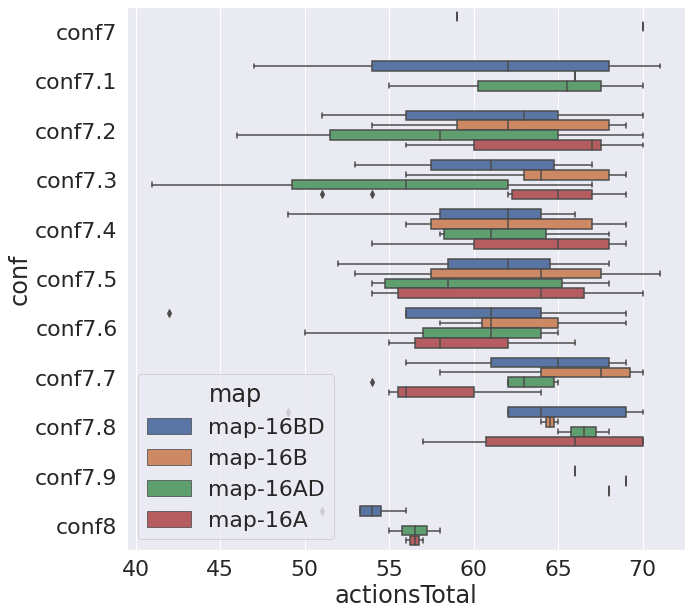

In [109]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
plotSimu = sns.boxplot(data=explored100Simu.sort_values(by=['conf']), x="actionsTotal", y="conf", hue="map")

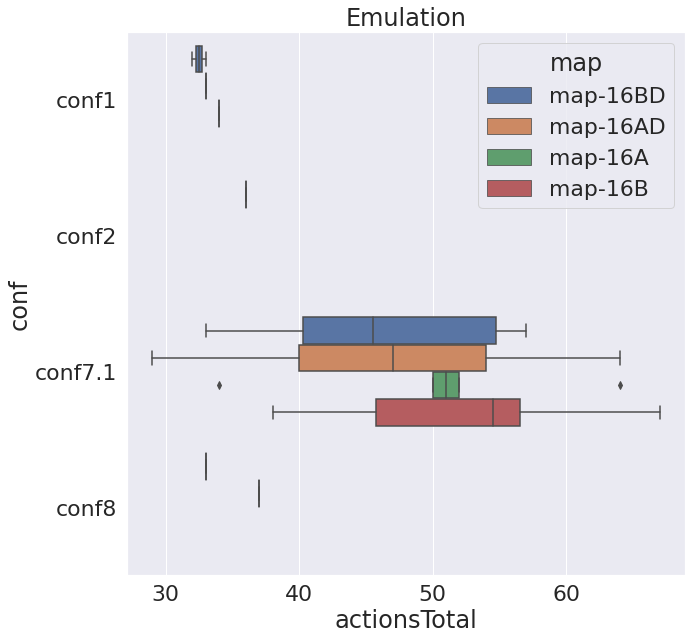

In [110]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
plotEmul = sns.boxplot(data=explored100Emul.sort_values(by=['conf']), x="actionsTotal", y="conf", hue="map").set_title("Emulation")

(2112, 11)
(1717, 11)
(946, 11)


Text(0.5, 1.0, '')

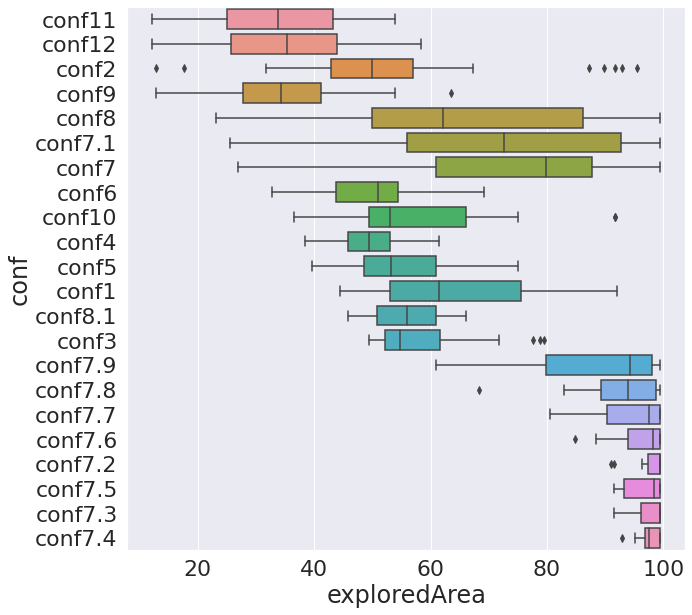

In [111]:
# Capture the configurations that partially complete the exploration (target found but area explored < 100%)
print(dff.shape)
pTargetFound = dff[dff['exploredArea'] < 100]
print(pTargetFound.shape)
pTargetFound = pTargetFound[pTargetFound['targetFound'] == 1]
print(pTargetFound.shape)
# Show results to indicate 
pTargetFoundPLot = pTargetFound.groupby(["conf","map"])
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.boxplot(data=pTargetFound.sort_values(by=['exploredArea']), x="exploredArea", y="conf").set_title("")

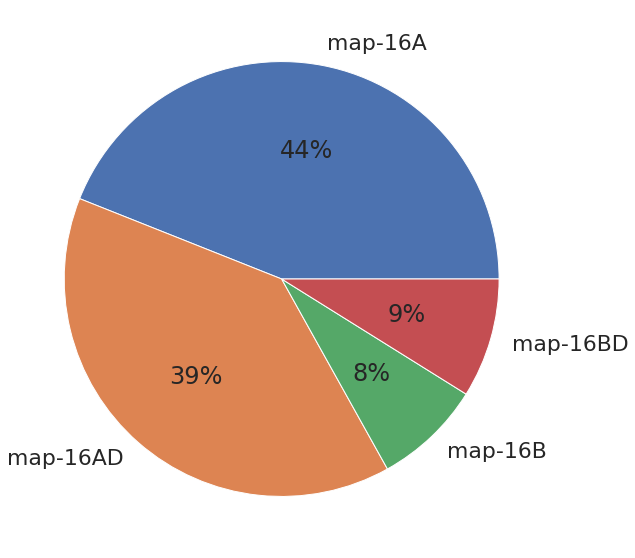

In [112]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
pTargetFound.map.str.get_dummies().sum().plot.pie(label='', autopct='%1.0f%%')

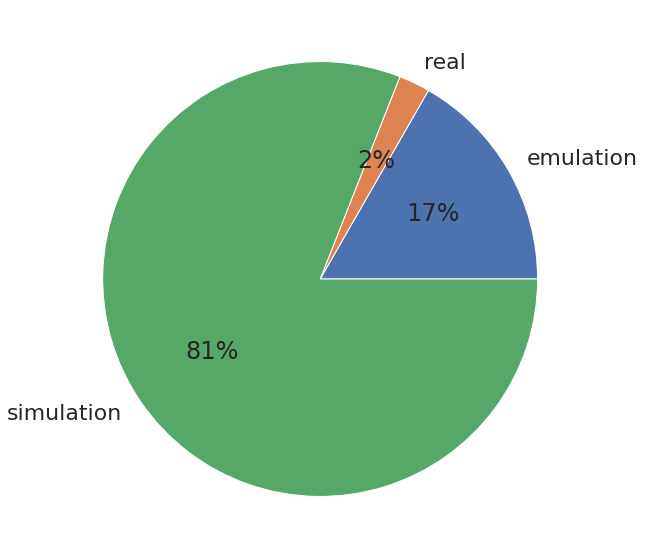

In [113]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
pTargetFound.type.str.get_dummies().sum().plot.pie(label='', autopct='%1.0f%%')

## Extraction baseline simulation & Emulation
This data was generated to compare an ideal formulation where the system performs just the "Explore" action in simulation. This data inform the number of actions that allow the full (100%) map area exploration using the used navigation strategy in the simulation environment.

In [114]:
dfBase = dff[dff['conf'] == 'conf0']
dfBaseSimu = dfBase[dfBase['type'] == 'simulation']
dfBaseEmul = dfBase[dfBase['type'] == 'emulation']
dfBase.describe()

,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal
count,96.000000,96.0,96.0,96.0,96.000000
mean,5.500000,1.0,100.0,1.0,41.062500
std,3.470174,0.0,0.0,0.0,10.402239
min,0.000000,1.0,100.0,1.0,21.000000
25%,2.750000,1.0,100.0,1.0,30.000000
50%,5.500000,1.0,100.0,1.0,44.500000
75%,8.250000,1.0,100.0,1.0,49.000000
max,11.000000,1.0,100.0,1.0,53.000000


In [115]:
dfBase.groupby(['map','type'])['actionsTotal'].describe()

count       mean       std   min    25%   50%    75%  \
map      type                                                               
map-16A  emulation    12.0  35.166667  5.507571  26.0  30.75  36.5  40.00   
         simulation   12.0  52.250000  1.215431  49.0  52.00  53.0  53.00   
map-16AD emulation    12.0  29.083333  5.264950  21.0  26.75  28.5  30.25   
         simulation   12.0  48.666667  0.492366  48.0  48.00  49.0  49.00   
map-16B  emulation    12.0  34.416667  6.666856  24.0  27.75  36.0  39.25   
         simulation   12.0  52.166667  1.114641  50.0  52.00  52.5  53.00   
map-16BD emulation    12.0  28.250000  3.387812  22.0  26.00  28.5  30.25   
         simulation   12.0  48.500000  1.167748  46.0  49.00  49.0  49.00   

                      max  
map      type              
map-16A  emulation   41.0  
         simulation  53.0  
map-16AD emulation   41.0  
         simulation  49.0  
map-16B  emulation   43.0  
         simulation  53.0  
map-16BD emulation   34.0  
         simulation  49.0

In [116]:
dfBase.groupby(['type'])['actionsTotal'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
emulation,48.0,31.729167,6.034439,21.0,27.0,30.0,37.25,43.0
simulation,48.0,50.395833,2.090908,46.0,49.0,49.0,53.00,53.0


In [117]:
# Speed diference between the simulation and the emulation. 
ratio = 31.729167/50.395833
print(ratio)

0.6295990186331477


In [118]:
dfBaseSimuNorm = dfBaseSimu['actionsTotal'].multiply(ratio)
dfBaseSimuNorm.describe()

count    48.000000
mean     31.729167
std       1.316434
min      28.961555
25%      30.850352
50%      30.850352
75%      33.368748
max      33.368748
Name: actionsTotal, dtype: float64

In [119]:
dfBaseSimu.groupby(['map'])['actionsTotal'].describe()

,count,mean,std,min,25%,50%,75%,max
map,,,,,,,,
map-16A,12.0,52.250000,1.215431,49.0,52.0,53.0,53.0,53.0
map-16AD,12.0,48.666667,0.492366,48.0,48.0,49.0,49.0,49.0
map-16B,12.0,52.166667,1.114641,50.0,52.0,52.5,53.0,53.0
map-16BD,12.0,48.500000,1.167748,46.0,49.0,49.0,49.0,49.0


In [120]:
dfBaseEmul.groupby(['map'])['actionsTotal'].describe()

,count,mean,std,min,25%,50%,75%,max
map,,,,,,,,
map-16A,12.0,35.166667,5.507571,26.0,30.75,36.5,40.00,41.0
map-16AD,12.0,29.083333,5.264950,21.0,26.75,28.5,30.25,41.0
map-16B,12.0,34.416667,6.666856,24.0,27.75,36.0,39.25,43.0
map-16BD,12.0,28.250000,3.387812,22.0,26.00,28.5,30.25,34.0


## Performace Metric generation
In order to compare and select the configurations with the best performace, a performace metric was definied. The performace metric take into acount, the percentage of area explored, the total number of actions and the percentage of target founds. The formula for me metric is: AreaExplored/TotalActionsCount*TargetFoundPercentage.

In [121]:
# Metric for total number of actions vs explored area.
dff["exploredRatio"] = dff["exploredArea"].div(dff["actionsTotal"].values).multiply(dff["targetFound"])
dff.head()#.info()#.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,type,conf,expFolder,map,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal,actionsCount,actionSequence,exploredRatio
0,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,0,1,49.39,11,59,"[0, 8, 25, 16, 10]","[1, 2, 4, 3, 2, 2, 2, 2, 1, 3, 3, 1, 1, 3, 2, ...",0.837119
1,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,1,1,64.63,5,58,"[0, 8, 33, 13, 4]","[2, 2, 2, 2, 2, 2, 3, 2, 1, 4, 1, 2, 3, 1, 4, ...",1.114310
2,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,2,1,43.90,10,59,"[4, 6, 25, 16, 8]","[3, 3, 2, 0, 4, 2, 2, 3, 3, 2, 2, 2, 1, 2, 3, ...",0.744068
3,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,3,1,45.12,9,59,"[6, 6, 23, 12, 12]","[2, 2, 2, 2, 4, 4, 2, 2, 3, 0, 4, 2, 1, 1, 2, ...",0.764746
4,simulation,conf10,Exp-22-09-20T07-46-51,map-16A,4,1,52.44,9,59,"[1, 5, 23, 14, 16]","[4, 3, 2, 2, 2, 3, 3, 1, 4, 3, 2, 2, 3, 2, 4, ...",0.888814


In [122]:
# Average numeric values ordered by the exploredRatio metric.
dff[dff['exploredArea'] == 100].groupby(['conf','map']).mean().sort_values(by=['exploredRatio'])

expNumber  targetFound  exploredArea  takeoffsCount  \
conf    map                                                             
conf7   map-16B    5.000000          1.0         100.0      11.000000   
conf7.9 map-16AD   8.000000          1.0         100.0       8.000000   
        map-16A   10.000000          1.0         100.0       5.000000   
conf7.8 map-16AD   6.750000          1.0         100.0       5.250000   
conf7.9 map-16B    8.000000          1.0         100.0       4.000000   
conf7.7 map-16B    4.500000          1.0         100.0       4.500000   
conf7.8 map-16B    5.500000          1.0         100.0       2.000000   
conf7.3 map-16B    4.888889          1.0         100.0       1.888889   
conf7.8 map-16A    4.250000          1.0         100.0       4.000000   
conf7.7 map-16BD   5.666667          1.0         100.0       4.222222   
conf7.2 map-16A    6.428571          1.0         100.0       3.571429   
conf7.4 map-16A    5.444444          1.0         100.0       1.777778   
conf7.3 map-16A    5.200000          1.0         100.0       2.300000   
conf7.6 map-16B    5.857143          1.0         100.0       2.571429   
conf7.5 map-16B    7.714286          1.0         100.0       2.285714   
conf7.2 map-16B    5.800000          1.0         100.0       3.200000   
conf7.4 map-16B    5.571429          1.0         100.0       1.571429   
conf7.8 map-16BD   6.600000          1.0         100.0       4.400000   
conf7.7 map-16AD   5.833333          1.0         100.0       4.000000   
conf7.4 map-16AD   4.700000          1.0         100.0       2.300000   
conf7.5 map-16A    4.571429          1.0         100.0       3.428571   
        map-16BD   6.000000          1.0         100.0       2.272727   
conf7.3 map-16BD   6.100000          1.0         100.0       1.900000   
conf7.2 map-16BD   4.333333          1.0         100.0       3.444444   
conf7.4 map-16BD   6.000000          1.0         100.0       2.727273   
conf7.6 map-16AD   5.777778          1.0         100.0       3.555556   
conf7.5 map-16AD   5.500000          1.0         100.0       3.250000   
conf7.6 map-16A    5.666667          1.0         100.0       3.333333   
conf7   map-16BD   4.000000          1.0         100.0       7.000000   
conf7.6 map-16BD   6.333333          1.0         100.0       4.000000   
conf7.7 map-16A    6.666667          1.0         100.0       3.666667   
conf7.2 map-16AD   5.727273          1.0         100.0       2.818182   
conf8   map-16A    5.000000          1.0         100.0       5.500000   
conf7.3 map-16AD   5.500000          1.0         100.0       2.166667   
conf8   map-16AD   6.600000          1.0         100.0       4.200000   
conf7.1 map-16AD   4.192308          1.0         100.0       3.461538   
        map-16BD   3.894737          1.0         100.0       2.894737   
        map-16B    3.166667          1.0         100.0       2.916667   
conf8   map-16BD   4.000000          1.0         100.0       3.571429   
conf7.1 map-16A    2.666667          1.0         100.0       3.000000   
conf0   map-16A    5.500000          1.0         100.0       1.000000   
        map-16B    5.500000          1.0         100.0       1.000000   
conf2   map-16BD  10.000000          1.0         100.0       0.000000   
conf0   map-16AD   5.500000          1.0         100.0       1.000000   
        map-16BD   5.500000          1.0         100.0       1.000000   
conf1   map-16A   11.000000          1.0         100.0       1.000000   
        map-16AD  11.000000          1.0         100.0       1.000000   
        map-16BD   6.500000          1.0         100.0       1.000000   

                  actionsTotal  exploredRatio  
conf    map                                    
conf7   map-16B      70.000000       1.428571  
conf7.9 map-16AD     69.000000       1.449275  
        map-16A      68.000000       1.470588  
conf7.8 map-16AD     66.500000       1.504185  
conf7.9 map-16B      66.000000       1.515152  
conf7.7 map-16B      65.750000 

[Text(0, 0.5, 'Configurations'), Text(0.5, 0, 'exploredRatio')]

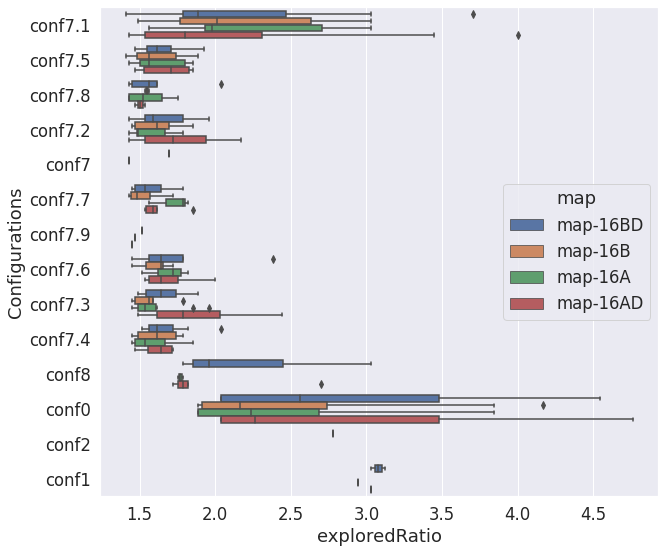

In [123]:
# Plot confs by explored ratio
plt.figure(figsize=(10,9))
sns.set(font_scale=1.5)
boxPAllMaps = sns.boxplot(data=dff[dff['exploredArea'] == 100].sort_values(by=['exploredRatio']), x="exploredRatio", y="conf", hue="map")
boxPAllMaps.set(xlabel='exploredRatio', ylabel='Configurations')

## Experiments on all type extraction
Data extraction for experiments collected in real, emulation and simulation. 


In [124]:
print(dff["conf"].unique())   # Show unique configurations
fullTestedConf = ['conf7.1','conf8']
dfTestedConfs = dff[dff['conf'].isin(fullTestedConf)]
dfS100TestedConfs = explored100[explored100['conf'].isin(fullTestedConf)]

['conf10' 'conf11' 'conf7.1' 'conf9' 'conf5' 'conf12' 'conf7.2' 'conf7.9'
 'conf8' 'conf7.6' 'conf7.4' 'conf4' 'conf1' 'conf2' 'conf7.8' 'conf6'
 'conf3' 'conf0' 'conf7.7' 'conf7.5' 'conf7' 'conf7.3' 'conf8.1']


In [125]:
print(dfTestedConfs["conf"].unique())   # Show unique configurations
# show all experiments in the selected configurations
print(dfTestedConfs["expFolder"].unique())  
# show all successfull mission experiments in the selected configurations
print(dfS100TestedConfs["expFolder"].unique())  

['conf7.1' 'conf8']
['Exp-22-09-24T18-15-45' 'Exp-22-09-04T23-01-33' 'Exp-22-09-07T22-21-17'
 'Exp-22-11-04T18-12-26' 'Exp-22-09-04T20-30-27' 'Exp-22-09-04T16-09-49'
 'Exp-22-09-18T22-37-00' 'Exp-22-09-18T17-13-57' 'Exp-22-08-29T07-22-36'
 'Exp-22-10-09T22-47-57' 'Exp-22-09-05T11-18-35' 'Exp-22-09-05T13-21-58'
 'Exp-22-09-06T07-38-11' 'Exp-22-08-29T08-57-20' 'Exp-22-08-29'
 'Exp-22-09-08' 'Exp-22-09-01']
['Exp-22-09-24T18-15-45' 'Exp-22-11-04T18-12-26' 'Exp-22-09-18T22-37-00'
 'Exp-22-10-09T22-47-57' 'Exp-22-09-05T13-21-58' 'Exp-22-09-06T07-38-11'
 'Exp-22-08-29' 'Exp-22-09-08']


In [126]:
# Filter simulation configuration, select the (conf7.1,conf8)*(emul,real,simu) experiments to compare 
dfS100TestedConfs.groupby(['conf','type','expFolder']).mean()

expNumber  targetFound  \
conf    type       expFolder                                       
conf7.1 emulation  Exp-22-09-05T13-21-58   1.666667          1.0   
                   Exp-22-09-06T07-38-11   7.000000          1.0   
                   Exp-22-10-09T22-47-57   4.107143          1.0   
        real       Exp-22-08-29            0.500000          1.0   
                   Exp-22-09-08            1.000000          1.0   
        simulation Exp-22-09-24T18-15-45   6.200000          1.0   
                   Exp-22-11-04T18-12-26   4.666667          1.0   
conf8   emulation  Exp-22-09-06T07-38-11   8.000000          1.0   
        real       Exp-22-09-08            0.500000          1.0   
        simulation Exp-22-09-18T22-37-00   5.400000          1.0   

                                          exploredArea  takeoffsCount  \
conf    type       expFolder                                            
conf7.1 emulation  Exp-22-09-05T13-21-58         100.0       1.000000   
                   Exp-22-09-06T07-38-11         100.0       2.000000   
                   Exp-22-10-09T22-47-57         100.0       3.142857   
        real       Exp-22-08-29                  100.0       1.750000   
                   Exp-22-09-08                  100.0       2.571429   
        simulation Exp-22-09-24T18-15-45         100.0       2.800000   
                   Exp-22-11-04T18-12-26         100.0       4.400000   
conf8   emulation  Exp-22-09-06T07-38-11         100.0       0.500000   
        real       Exp-22-09-08                  100.0       5.000000   
        simulation Exp-22-09-18T22-37-00         100.0       4.600000   

                                          actionsTotal  
conf    type       expFolder                            
conf7.1 emulation  Exp-22-09-05T13-21-58     32.000000  
                   Exp-22-09-06T07-38-11     33.000000  
                   Exp-22-10-09T22-47-57     50.821429  
        real       Exp-22-08-29              32.000000  
                   Exp-22-09-08              37.000000  
        simulation Exp-22-09-24T18-15-45     53.800000  
                   Exp-22-11-04T18-12-26     65.933333  
conf8   emulation  Exp-22-09-06T07-38-11     35.000000  
        real       Exp-22-09-08              42.000000  
        simulation Exp-22-09-18T22-37-00     55.400000

In [127]:
# List experiment folder configuration conf7.1, conf8
fullTestedExpEmul = ['Exp-22-10-09T22-47-57','Exp-22-09-06T07-38-11']
fullTestedExpReal = ['Exp-22-09-08']
fullTestedExpSimu = ['Exp-22-11-04T18-12-26','Exp-22-09-18T22-37-00']
fullTestedExp = fullTestedExpEmul + fullTestedExpReal + fullTestedExpSimu
dfTestedConfs12 = dfS100TestedConfs[dfS100TestedConfs['expFolder'].isin(fullTestedExp)]

In [128]:
dfTestedConfs12.groupby(['conf','type']).mean()

expNumber  targetFound  exploredArea  takeoffsCount  \
conf    type                                                              
conf7.1 emulation    4.206897          1.0         100.0       3.103448   
        real         1.000000          1.0         100.0       2.571429   
        simulation   4.666667          1.0         100.0       4.400000   
conf8   emulation    8.000000          1.0         100.0       0.500000   
        real         0.500000          1.0         100.0       5.000000   
        simulation   5.400000          1.0         100.0       4.600000   

                    actionsTotal  
conf    type                      
conf7.1 emulation      50.206897  
        real           37.000000  
        simulation     65.933333  
conf8   emulation      35.000000  
        real           42.000000  
        simulation     55.400000

In [129]:
dfTestedConfs12.describe()

,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal
count,65.000000,65.0,65.0,65.000000,65.000000
mean,4.153846,1.0,100.0,3.553846,52.492308
std,3.143599,0.0,0.0,2.023539,11.258501
min,0.000000,1.0,100.0,0.000000,27.000000
25%,1.000000,1.0,100.0,2.000000,45.000000
50%,4.000000,1.0,100.0,3.000000,54.000000
75%,7.000000,1.0,100.0,5.000000,61.000000
max,11.000000,1.0,100.0,8.000000,71.000000


[Text(0, 0.5, 'Experimental type approach'),
 Text(0.5, 0, 'Total number of actions')]

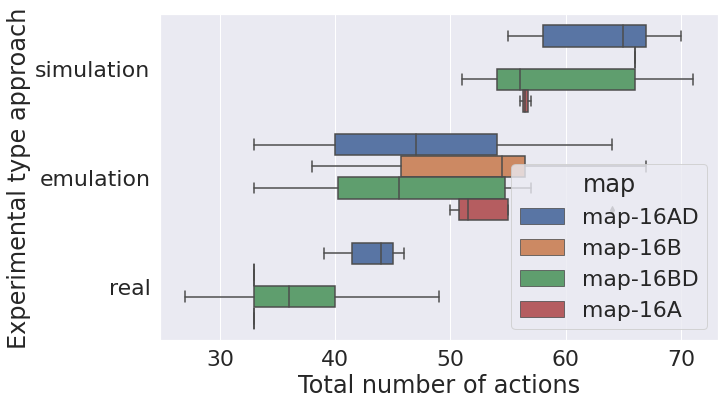

In [130]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
boxPAllTypes = sns.boxplot(data=dfTestedConfs12[dfTestedConfs12['exploredArea'] == 100], x="actionsTotal", y="type", hue="map")
boxPAllTypes.set(xlabel='Total number of actions', ylabel='Experimental type approach')

## Experiments to test different Discount Factor values
Extraction of data from the experiments conducted to explore the influece of the Discount Factor (Gamma) in the formulation.

In [131]:
# Select experiments for gamma
mask = dff['conf'].str.contains(r'conf7', na=True)
gammaExp = dff.loc[mask].sort_values(by=['conf','map'])
gammaExp = gammaExp.loc[gammaExp['type']=='simulation']   # Get gamma experiments from simulation only

In [132]:
print(gammaExp["conf"].unique())
print(gammaExp["type"].unique()) # Check the gamma data is from what experimental type.

['conf7' 'conf7.1' 'conf7.2' 'conf7.3' 'conf7.4' 'conf7.5' 'conf7.6'
 'conf7.7' 'conf7.8' 'conf7.9']
['simulation']


In [133]:
print(gammaExp[gammaExp["conf"]=='conf7.1']["expFolder"].unique()) # Check the gamma data is from what experimental type.

['Exp-22-09-24T18-15-45' 'Exp-22-09-04T23-01-33' 'Exp-22-09-07T22-21-17'
 'Exp-22-11-04T18-12-26' 'Exp-22-09-04T20-30-27' 'Exp-22-09-04T16-09-49']


In [134]:
# Extract similar statistical experiments
gammaExpFiltered = gammaExp.loc[gammaExp['actionsTotal']>50]   # Get gamma experiments with more than 40 actions
gammaExpFiltered.describe()

,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal,exploredRatio
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5.497553,0.874388,90.283980,5.443719,65.544861,1.255592
std,3.453531,0.331682,13.785055,3.220469,5.663496,0.521385
min,0.000000,0.000000,45.730000,0.000000,51.000000,0.000000
25%,3.000000,1.000000,84.620000,3.000000,59.000000,1.219492
50%,5.000000,1.000000,98.780000,5.000000,69.000000,1.402429
75%,8.000000,1.000000,100.000000,8.000000,70.000000,1.538462
max,11.000000,1.000000,100.000000,16.000000,71.000000,1.960784


# 4. General Plots
This plots show the general distribution of the experiments



In [135]:
dfBaseMaps = dfBase.groupby(['map'])#.mean() #.plot() #head()#

In [136]:
dfBaseMaps.mean()#.describe()

,expNumber,targetFound,exploredArea,takeoffsCount,actionsTotal
map,,,,,
map-16A,5.5,1.0,100.0,1.0,43.708333
map-16AD,5.5,1.0,100.0,1.0,38.875000
map-16B,5.5,1.0,100.0,1.0,43.291667
map-16BD,5.5,1.0,100.0,1.0,38.375000


In [137]:
gammaExp.groupby(['conf','expFolder']).mean()

expNumber  targetFound  exploredArea  \
conf    expFolder                                                     
conf7   Exp-22-09-24T09-08-28        5.5     0.583333     65.887083   
        Exp-22-09-25T11-58-39        5.5     0.708333     77.622292   
        Exp-22-11-05T07-43-59        5.5     0.770833     79.155417   
conf7.1 Exp-22-09-04T16-09-49        1.0     0.500000     54.243333   
        Exp-22-09-04T20-30-27        0.0     0.500000     62.055000   
        Exp-22-09-04T23-01-33        5.5     0.500000     54.980208   
        Exp-22-09-07T22-21-17        2.5     0.500000     53.650000   
        Exp-22-09-24T18-15-45        5.5     0.791667     86.555000   
        Exp-22-11-04T18-12-26        5.5     0.937500     94.483958   
conf7.2 Exp-22-09-26T07-52-40        5.5     1.000000     99.262292   
conf7.3 Exp-22-10-01T17-34-10        5.5     0.979167     99.376250   
conf7.4 Exp-22-10-02T16-05-42        5.5     1.000000     99.430625   
conf7.5 Exp-22-09-26T21-32-04        5.5     0.979167     99.008333   
conf7.6 Exp-22-09-28T06-25-00        5.5     0.979167     98.115625   
conf7.7 Exp-22-09-29T12-00-37        5.5     0.979167     96.955625   
conf7.8 Exp-22-09-30T20-48-31        5.5     0.958333     94.659583   
conf7.9 Exp-22-10-03T12-43-01        5.5     0.729167     85.406250   

                               takeoffsCount  actionsTotal  exploredRatio  
conf    expFolder                                                          
conf7   Exp-22-09-24T09-08-28       8.250000     58.416667       0.697946  
        Exp-22-09-25T11-58-39       9.937500     70.041667       0.838085  
        Exp-22-11-05T07-43-59      10.041667     70.645833       0.893917  
conf7.1 Exp-22-09-04T16-09-49       3.250000     34.333333       0.798779  
        Exp-22-09-04T20-30-27       1.500000     34.250000       0.833714  
        Exp-22-09-04T23-01-33       3.458333     34.479167       0.799336  
        Exp-22-09-07T22-21-17       3.166667     34.416667       0.824872  
        Exp-22-09-24T18-15-45       4.354167     57.729167       1.240218  
        Exp-22-11-04T18-12-26       5.270833     69.041667       1.303413  
conf7.2 Exp-22-09-26T07-52-40       3.229167     63.854167       1.577453  
conf7.3 Exp-22-10-01T17-34-10       2.145833     61.916667       1.608458  
conf7.4 Exp-22-10-02T16-05-42       2.479167     63.562500       1.576944  
conf7.5 Exp-22-09-26T21-32-04       2.958333     63.187500       1.559148  
conf7.6 Exp-22-09-28T06-25-00       3.583333     64.687500       1.512546  
conf7.7 Exp-22-09-29T12-00-37       4.645833     66.645833       1.440439  
conf7.8 Exp-22-09-30T20-48-31       5.145833     68.312500       1.346032  
conf7.9 Exp-22-10-03T12-43-01       7.979167     69.666667       0.936084

In [138]:
gammaExp.groupby(['conf','map']).mean()

expNumber  targetFound  exploredArea  takeoffsCount  \
conf    map                                                             
conf7   map-16A    5.500000     1.000000     69.665278       9.138889   
        map-16AD   5.500000     1.000000     78.703889       9.611111   
        map-16B    5.500000     0.194444     68.513056       9.666667   
        map-16BD   5.500000     0.555556     80.004167       9.222222   
conf7.1 map-16A    4.695652     1.000000     68.796087       4.195652   
        map-16AD   4.695652     1.000000     78.887826       3.891304   
        map-16B    4.695652     0.282609     70.214348       3.869565   
        map-16BD   4.695652     0.478261     75.920435       4.326087   
conf7.2 map-16A    5.500000     1.000000     99.186667       3.250000   
        map-16AD   5.500000     1.000000     99.946667       2.916667   
        map-16B    5.500000     1.000000     98.983333       3.083333   
        map-16BD   5.500000     1.000000     98.932500       3.666667   
conf7.3 map-16A    5.500000     1.000000     99.542500       2.250000   
        map-16AD   5.500000     1.000000    100.000000       2.166667   
        map-16B    5.500000     0.916667     98.069167       2.166667   
        map-16BD   5.500000     1.000000     99.893333       2.000000   
conf7.4 map-16A    5.500000     1.000000     99.491667       2.000000   
        map-16AD   5.500000     1.000000     99.199167       2.416667   
        map-16B    5.500000     1.000000     99.085000       2.666667   
        map-16BD   5.500000     1.000000     99.946667       2.833333   
conf7.5 map-16A    5.500000     1.000000     98.373333       3.166667   
        map-16AD   5.500000     1.000000    100.000000       3.250000   
        map-16B    5.500000     0.916667     97.713333       2.916667   
        map-16BD   5.500000     1.000000     99.946667       2.500000   
conf7.6 map-16A    5.500000     1.000000     96.035833       3.666667   
        map-16AD   5.500000     1.000000     99.680000       3.750000   
        map-16B    5.500000     0.916667     97.815000       3.083333   
        map-16BD   5.500000     1.000000     98.931667       3.833333   
conf7.7 map-16A    5.500000     1.000000     94.968333       4.500000   
        map-16AD   5.500000     1.000000     98.771667       4.500000   
        map-16B    5.500000     0.916667     95.578333       5.250000   
        map-16BD   5.500000     1.000000     98.504167       4.333333   
conf7.8 map-16A    5.500000     1.000000     94.055000       4.333333   
        map-16AD   5.500000     1.000000     96.901667       5.666667   
        map-16B    5.500000     0.916667     92.275833       5.416667   
        map-16BD   5.500000     0.916667     95.405833       5.166667   
conf7.9 map-16A    5.500000     1.000000     83.078333       7.500000   
        map-16AD   5.500000     1.000000     87.980000       7.833333   
        map-16B    5.500000     0.166667     77.082500       8.500000   
        map-16BD   5.500000     0.750000     93.484167       8.083333   

                  actionsTotal  exploredRatio  
conf    map                                    
conf7   map-16A      66.444444       1.052961  
        map-16AD     66.305556       1.186062  
        map-16B      66.361111       0.254437  
        map-16BD     66.361111       0.746470  
conf7.1 map-16A      50.065217       1.406684  
        map-16AD     49.282609       1.631361  
        map-16B      49.782609       0.413399  
        map-16BD     49.021739       0.748112  
conf7.2 map-16A      66.250000       1.505949  
        map-16AD     59.250000       1.721051  
        map-16B      66.916667       1.490397  
        map-16BD     63.000000       1.592414  
conf7.3 map-16A      64.333333       1.562736  
        map-16AD     55.083333       1.861284  
        map-16B      65.916667       1.394430  
        map-16BD     62.333333       1.615382  
conf7.4 map-16A      64.666667       1.548841  
        map-16AD     63.083333       1.

In [139]:
gammaExpFiltered.groupby(['conf'])['actionsTotal','exploredArea'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


actionsTotal                                                       \
               count       mean       std   min    25%   50%    75%   max   
conf                                                                        
conf7          144.0  66.368056  5.698419  56.0  59.00  70.0  71.00  71.0   
conf7.1         95.0  63.557895  6.070010  53.0  58.00  59.0  70.00  71.0   
conf7.2         46.0  64.586957  6.351119  51.0  59.75  67.5  70.00  71.0   
conf7.3         44.0  63.454545  5.550841  51.0  59.00  64.0  68.00  71.0   
conf7.4         47.0  63.872340  5.028687  54.0  59.00  65.0  68.00  71.0   
conf7.5         48.0  63.187500  6.420235  52.0  57.00  64.5  69.00  71.0   
conf7.6         46.0  65.500000  5.382069  55.0  61.00  67.5  70.75  71.0   
conf7.7         48.0  66.645833  4.746733  54.0  64.75  69.0  70.00  71.0   
conf7.8         47.0  68.723404  2.954011  57.0  68.00  70.0  70.50  71.0   
conf7.9         48.0  69.666667  1.172982  66.0  69.00  70.0  71.00  71.0   

        exploredArea                                                         \
               count       mean        std    min      25%      50%     75%   
conf                                                                          
conf7          144.0  74.221597  15.144455  45.73   61.590   75.625   86.54   
conf7.1         95.0  90.419684  11.263827  55.49   83.235   96.950   99.39   
conf7.2         46.0  99.230217   1.907645  91.03   99.390  100.000  100.00   
conf7.3         44.0  99.319545   2.526589  85.98  100.000  100.000  100.00   
conf7.4         47.0  99.418511   1.432207  92.95  100.000  100.000  100.00   
conf7.5         48.0  99.008333   2.737452  86.59  100.000  100.000  100.00   
conf7.6         46.0  98.033696   3.910524  84.76   99.360  100.000  100.00   
conf7.7         48.0  96.955625   5.044886  80.49   96.950   99.390  100.00   
conf7.8         47.0  94.545957   7.281184  68.29   91.670   97.560  100.00   
conf7.9         48.0  85.406250  12.604934  60.98   75.305   86.860   97.69   

                
           max  
conf            
conf7    100.0  
conf7.1  100.0  
conf7.2  100.0  
conf7.3  100.0  
conf7.4  100.0  
conf7.5  100.0  
conf7.6  100.0  
conf7.7  100.0  
conf7.8  100.0  
conf7.9  100.0

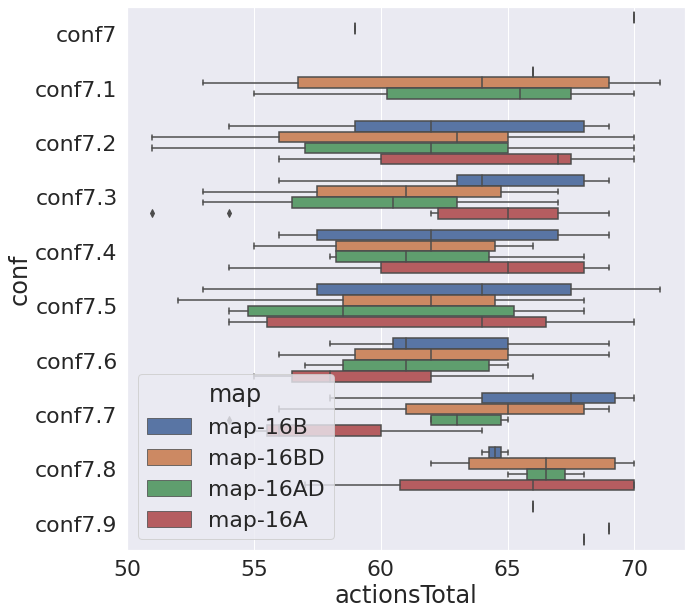

In [140]:
 # Gamma from [0.99, 0.9, 0.8 ... 0.1]
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
boxPAllMaps = sns.boxplot(data=gammaExpFiltered[gammaExpFiltered['exploredArea'] == 100], x="actionsTotal", y="conf", hue="map")

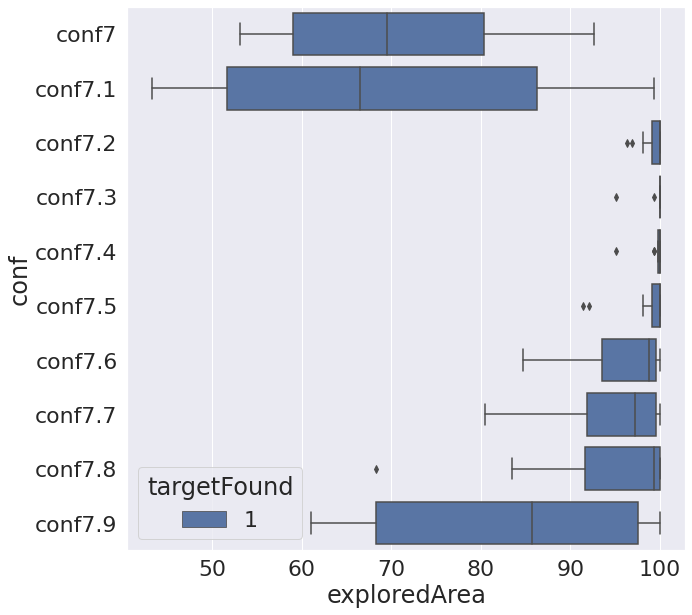

In [141]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
boxPA = sns.boxplot(data=gammaExp[gammaExp['map'] == 'map-16A'], x="exploredArea", y="conf", hue="targetFound")

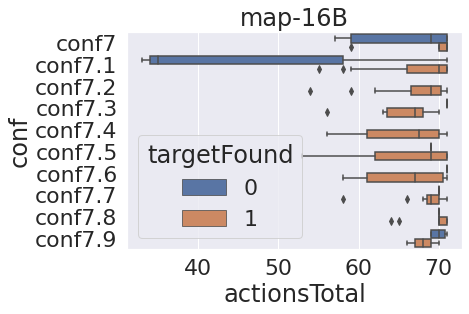

In [142]:
boxPAD = sns.boxplot(data=gammaExp[gammaExp['map'] == 'map-16B'], x="actionsTotal", y="conf", hue="targetFound").set_title("map-16B")

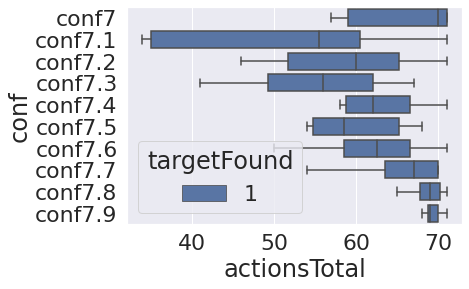

In [143]:
boxPB = sns.boxplot(data=gammaExp[gammaExp['map'] == 'map-16AD'], x="actionsTotal", y="conf", hue="targetFound")

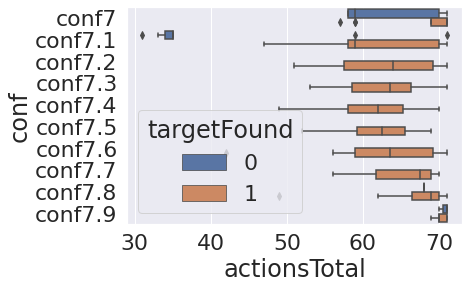

In [144]:
boxPBD = sns.boxplot(data=gammaExp[gammaExp['map'] == 'map-16BD'], x="actionsTotal", y="conf", hue="targetFound")

<Figure size 720x720 with 0 Axes>

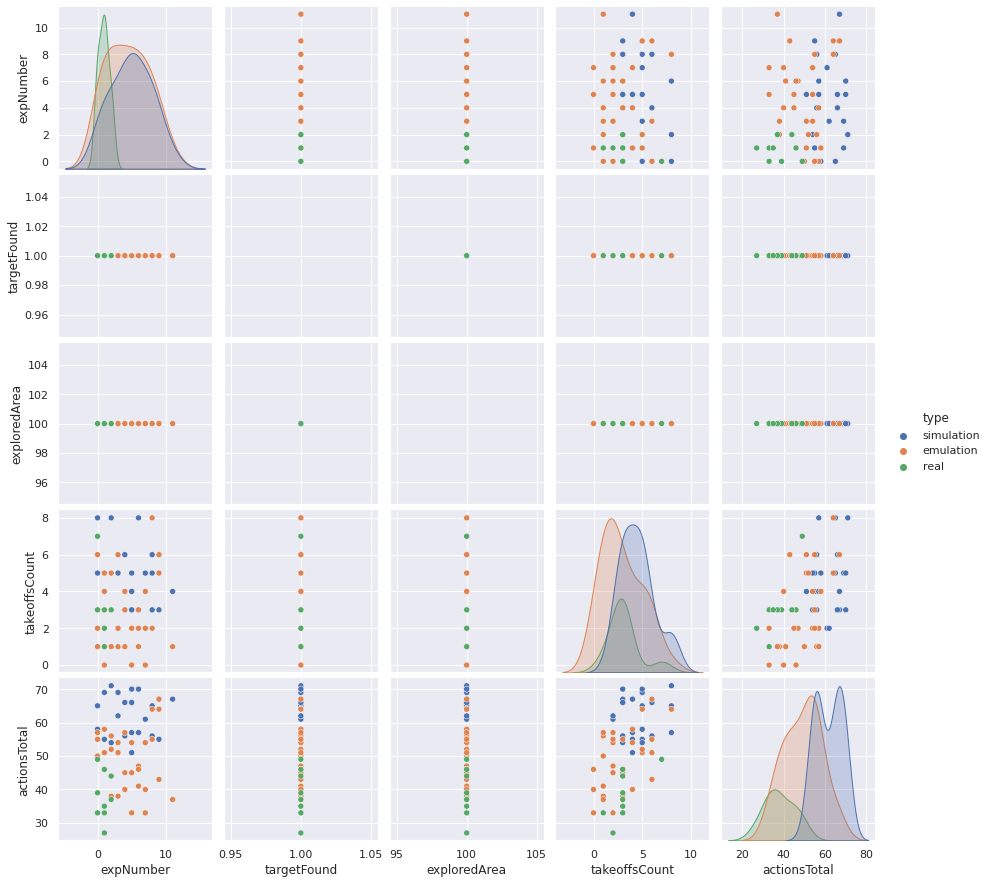

In [145]:
# sns.pairplot(dfTestedConfs, hue='type', height=2.5); # Diagonal is the marginal ditribution: https://en.wikipedia.org/wiki/Marginal_distribution
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.pairplot(dfTestedConfs12, hue='type', height=2.5);

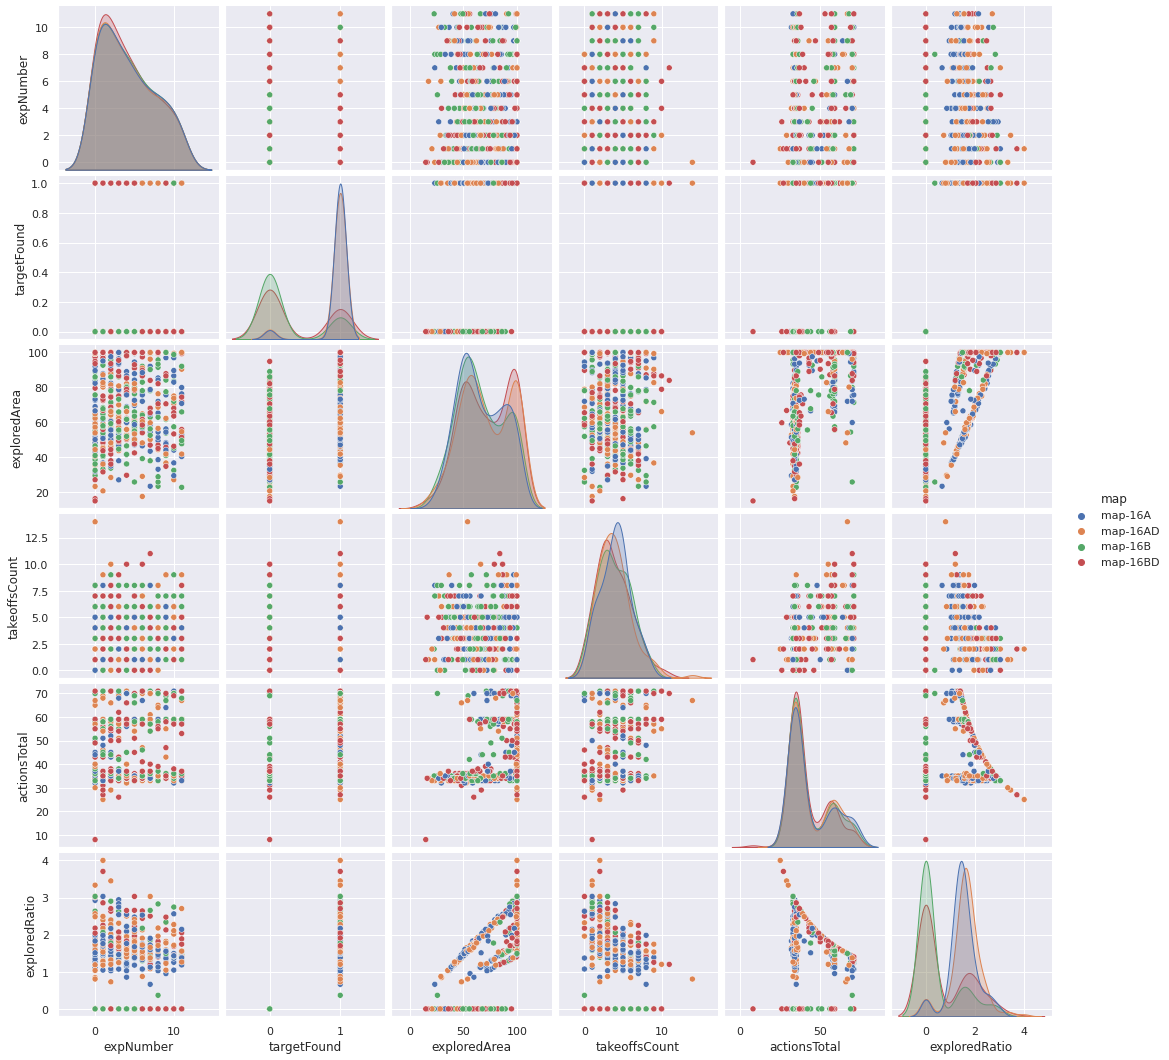

In [146]:
sns.pairplot(dfTestedConfs, hue='map', height=2.5);

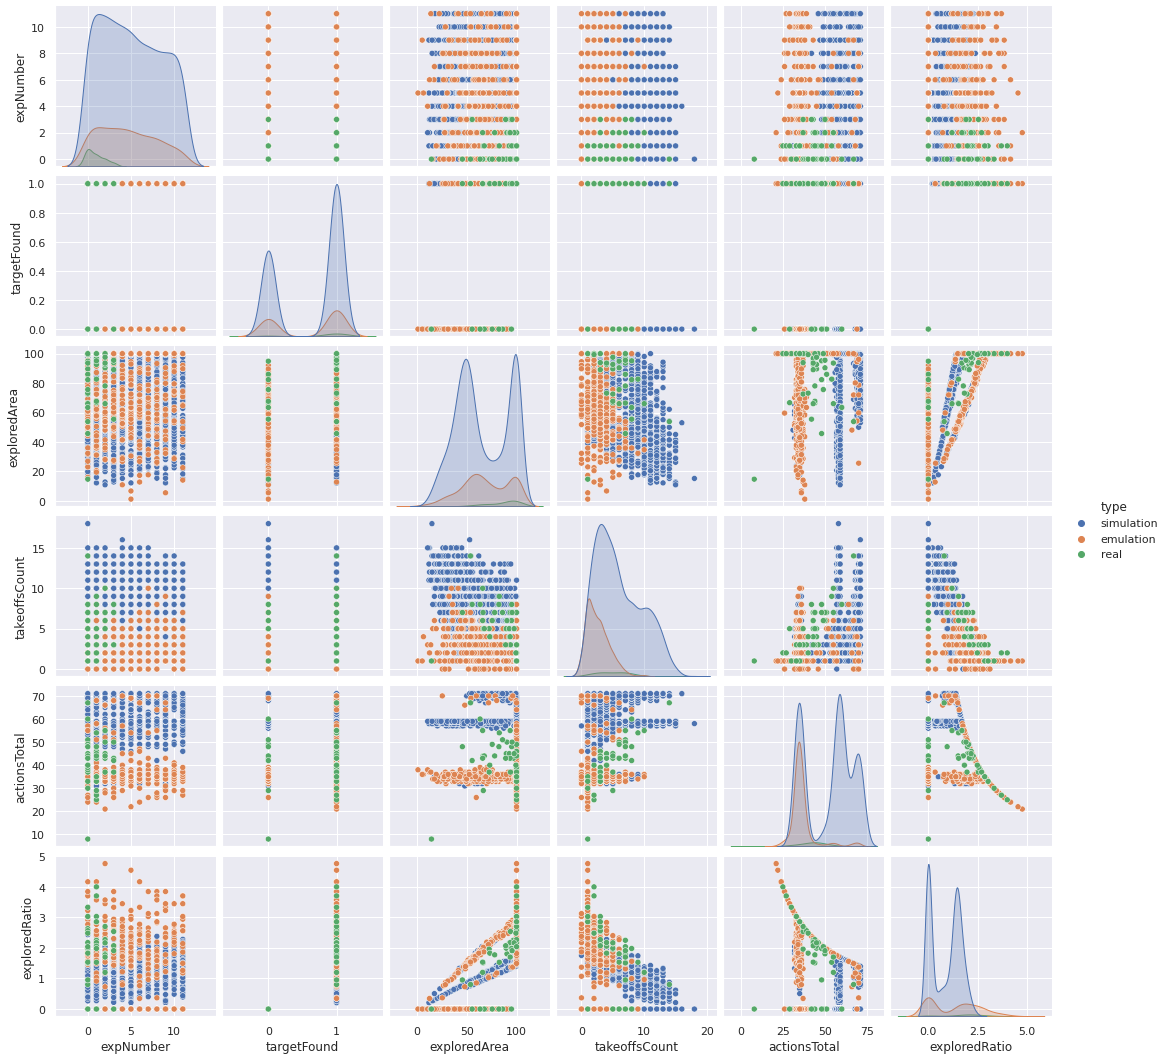

In [147]:
sns.pairplot(dff, hue='type', height=2.5);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


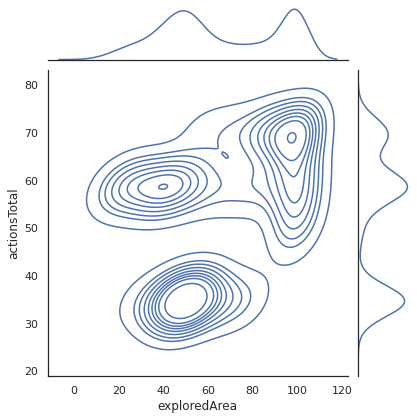

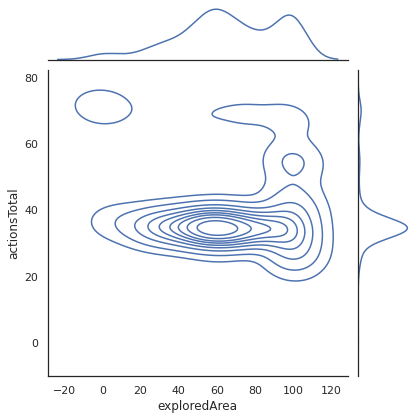

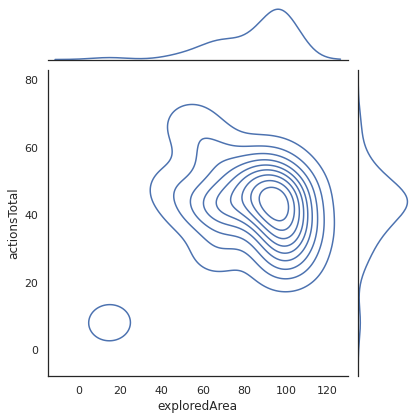

In [148]:
with sns.axes_style('white'):
    gs = sns.jointplot("exploredArea", "actionsTotal", dfSimu, kind='kde')  # kind="box","hex","reg","kde","count"
    ge = sns.jointplot("exploredArea", "actionsTotal", dfEmul, kind='kde')
    gr = sns.jointplot("exploredArea", "actionsTotal", dfReal, kind='kde')
    #gs.ax_joint.plot(np.linspace(0, 100),np.linspace(0, 100), ':k')

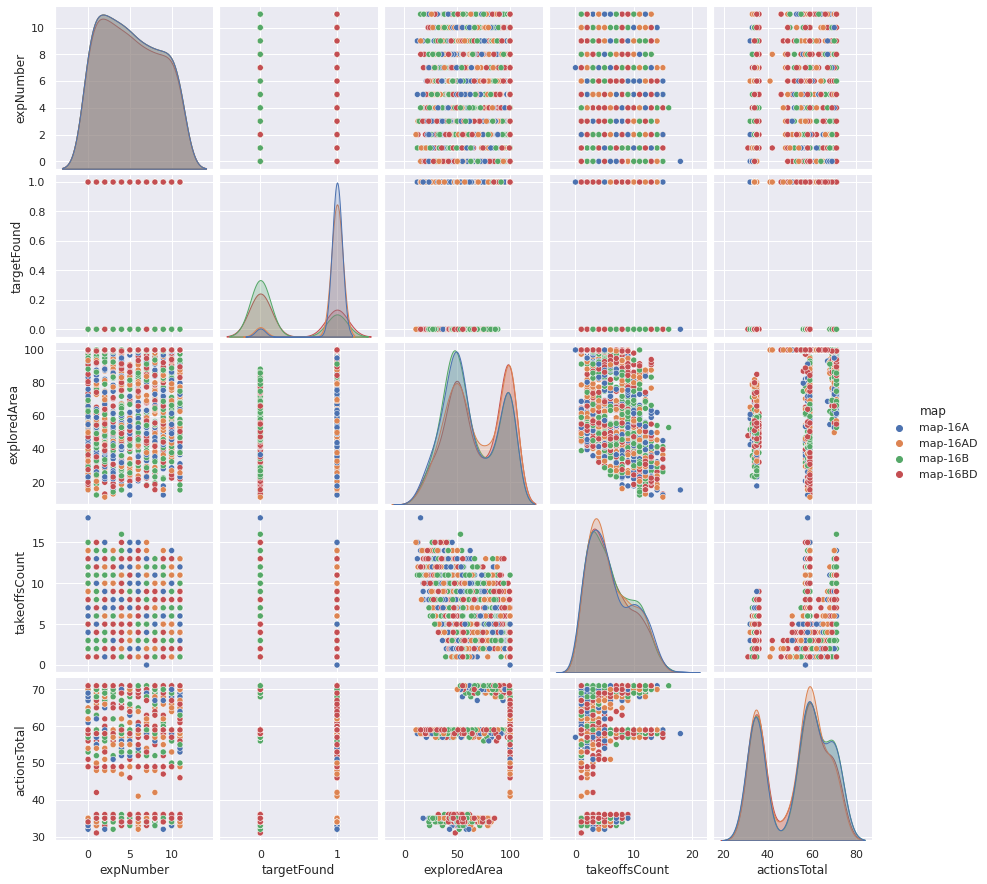

In [149]:
sns.pairplot(dfSimu, hue='map', height=2.5);

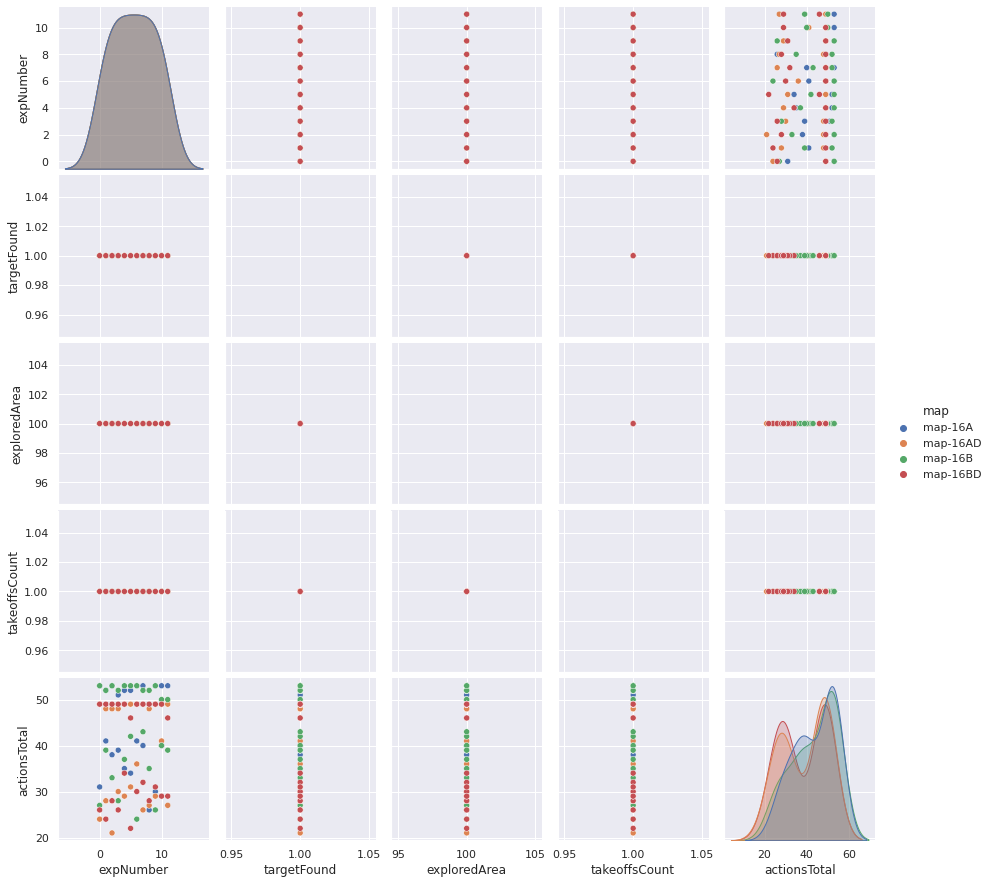

In [150]:
sns.pairplot(dfBase, hue='map', height=2.5);

# References and additional resources

Resources used for this plot: 

*   https://github.com/jakevdp/PythonDataScienceHandbook
*   https://pandas.pydata.org/docs/user_guide/index.html
*   https://www.analyticsvidhya.com/blog/2021/05/a-comprehensive-guide-to-data-analysis-using-pandas-hands-on-data-analysis-on-imdb-movies-data/
*   Pandas Plots Google: [link text](https://www.google.com/search?q=pandas+plots&tbm=isch&ved=2ahUKEwjEhPjc1_j6AhXVwzgGHTzPDVcQ2-cCegQIABAA&oq=pandas+plots&gs_lcp=CgNpbWcQAzIECAAQQzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDoECCMQJzoICAAQgAQQsQM6CAgAELEDEIMBOgcIABCxAxBDOgsIABCABBCxAxCDAToJCAAQgAQQChAYOgcIABCABBAYUL8kWM1DYOpEaANwAHgAgAHMAYgBkxWSAQYwLjE0LjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=qmxWY8SHJNWH4-EPvJ63uAU&bih=845&biw=1730&rlz=1C1CHBF_en-GBAU907AU907&hl=en
)




